<a href="https://colab.research.google.com/github/webishan/Ai-Agent-Development/blob/master/Module-3/1_Short_term_vs_Long_term_Memory_in_AI_Agents_%7C_Implementing_Memory_with_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langgraph langsmith langchain-groq

In [ ]:
groq_api_key = "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"

In [ ]:
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from typing import Annotated
from typing_extensions import TypedDict

In [ ]:
class State(TypedDict):
    message : Annotated[list, add_messages]

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="llama3-70b-8192",groq_api_key=groq_api_key)

In [ ]:
def chatbot(state: State):
  return {'message': [llm.invoke(state["message"])]}

In [ ]:
graph_builder = StateGraph(State)
graph_builder.add_node("llmchatbot",chatbot)
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)
graph = graph_builder.compile()  # Bind everything

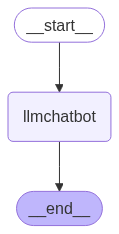

In [ ]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({'message': "hi"})

{'message': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='ee966bcc-a937-4b7d-8fa0-b8ca008e0a00'),
  AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.074097543, 'prompt_time': 0.000138407, 'queue_time': 0.009285137, 'total_time': 0.07423595}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_bf16903a67', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6aebd8b4-12b9-43ec-8b7a-ae7bb91eb165-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})]}